In [39]:
import pandas as pd
import re as regex
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('../../data/raw/mushrooms.csv')

#dictionary by Alessandro. Thank you.
dict = {'Class': {'e':'edible', 'p': 'poisonous'},
            'Cap Shape': {'b': 'bell', 'c': 'conical', 'x': 'convex', 'f': 'flat', 'k': 'knobbed', 's': 'sunken'},
            'Cap Surface': {'f': 'fibrous', 'g': 'grooves', 'y' : 'scaly', 's': 'smooth'},
            'Cap Color': {'n': 'brown', 'b':'buff','c':'cinnamon','g':'gray','r':'green','p':'pink','u':'purple','e': 'red','w':'white','y':'yellow'},
            'Bruises': {'t': True, 'f': False},
            'Odor': {'a': 'almond', 'l':'anise','c':'creosote','y':'fishy','f':'foul','m':'musty','n':'none','p':'pungent','s':'spicy'},
            'Gill Attachment': {'a':'attached', 'd':'descending','f':'free','n':'notched'},
            'Gill Spacing': {'c':'close','w':'crwoded','d':'distant'},
            'Gill Size': {'b':'broad','n':'narrow'},
            'Gill Color': {'k': 'black', 'n':'brown','b':'buff','h':'chocolate','g':'gray','r':'green','o':'orange','p':'pink','u':'purple','e':'red','w':'white','y':'yellow'},
            'Stalk Shape': {'e':'enlarging','t':'tapering'},
            'Stalk Root': {'b':'bulbous','c':'club','u':'cup','e':'equal','z':'rhizomorphs','r':'rooted','?':'unknown'},
            'Stalk Surface Above Ring': {'f':'fibrous','y':'scaly','k':'silky','s':'smooth'},
            'Stalk Surface Below Ring': {'f':'fibrous','y':'scaly','k':'silky','s':'smooth'},
            'Stalk Color Above Ring': {'n':'brown','b':'buff','c':'cinnamon','g':'gray','o':'orange','p':'pink','e':'red','w':'white','y':'yellow'},
            'Stalk Color Below Ring': {'n':'brown','b':'buff','c':'cinnamon','g':'gray','o':'orange','p':'pink','e':'red','w':'white','y':'yellow'},
            'Veil Type': {'p':'partial','u':'universal'},
            'Veil Color': {'n':'brown','o':'orange','w':'white','y':'yellow'},
            'Ring Number': {'n':0,'o':1,'t':2},
            'Ring Type': {'c':'cobwebby','e':'evanescent','f':'flaring','l':'large','n':'none','p':'pendant','s':'sheathing','z':'zone'},
            'Spore Print Color': {'k':'black','n':'brown','b':'buff','h':'chocolate','r':'green','o':'orange','u':'purlple','w':'white','y':'yellow'},
            'Population': {'a':'abundant','c':'clustered','n':'numerous','s':'scattered','v':'several','y':'solitary'},
            'Habitat': {'g':'grasses','l':'leaves','m':'meadows','p':'paths','u':'urban','w':'waste','d':'woods'}}
df=(df
 .rename(columns=lambda x: regex.sub(r'-',r' ',x))
 .rename(columns=lambda x: regex.sub(r'([a-z])([a-z]*)',lambda match: '{}{}'.format(match.group(1).upper(),match.group(2)),x))
 .replace(dict)
 .assign(Edible=df['class'])
 .replace({'Edible':{'e':True, 'p':False}})
)


print(df.head(3))

       Class Cap Shape Cap Surface Cap Color  Bruises     Odor  \
0  poisonous    convex      smooth     brown     True  pungent   
1     edible    convex      smooth    yellow     True   almond   
2     edible      bell      smooth     white     True    anise   

  Gill Attachment Gill Spacing Gill Size Gill Color  ...  \
0            free        close    narrow      black  ...   
1            free        close     broad      black  ...   
2            free        close     broad      brown  ...   

  Stalk Color Above Ring Stalk Color Below Ring Veil Type Veil Color  \
0                  white                  white   partial      white   
1                  white                  white   partial      white   
2                  white                  white   partial      white   

  Ring Number Ring Type Spore Print Color Population  Habitat Edible  
0           1   pendant             black  scattered    urban  False  
1           1   pendant             brown   numerous  grasses  

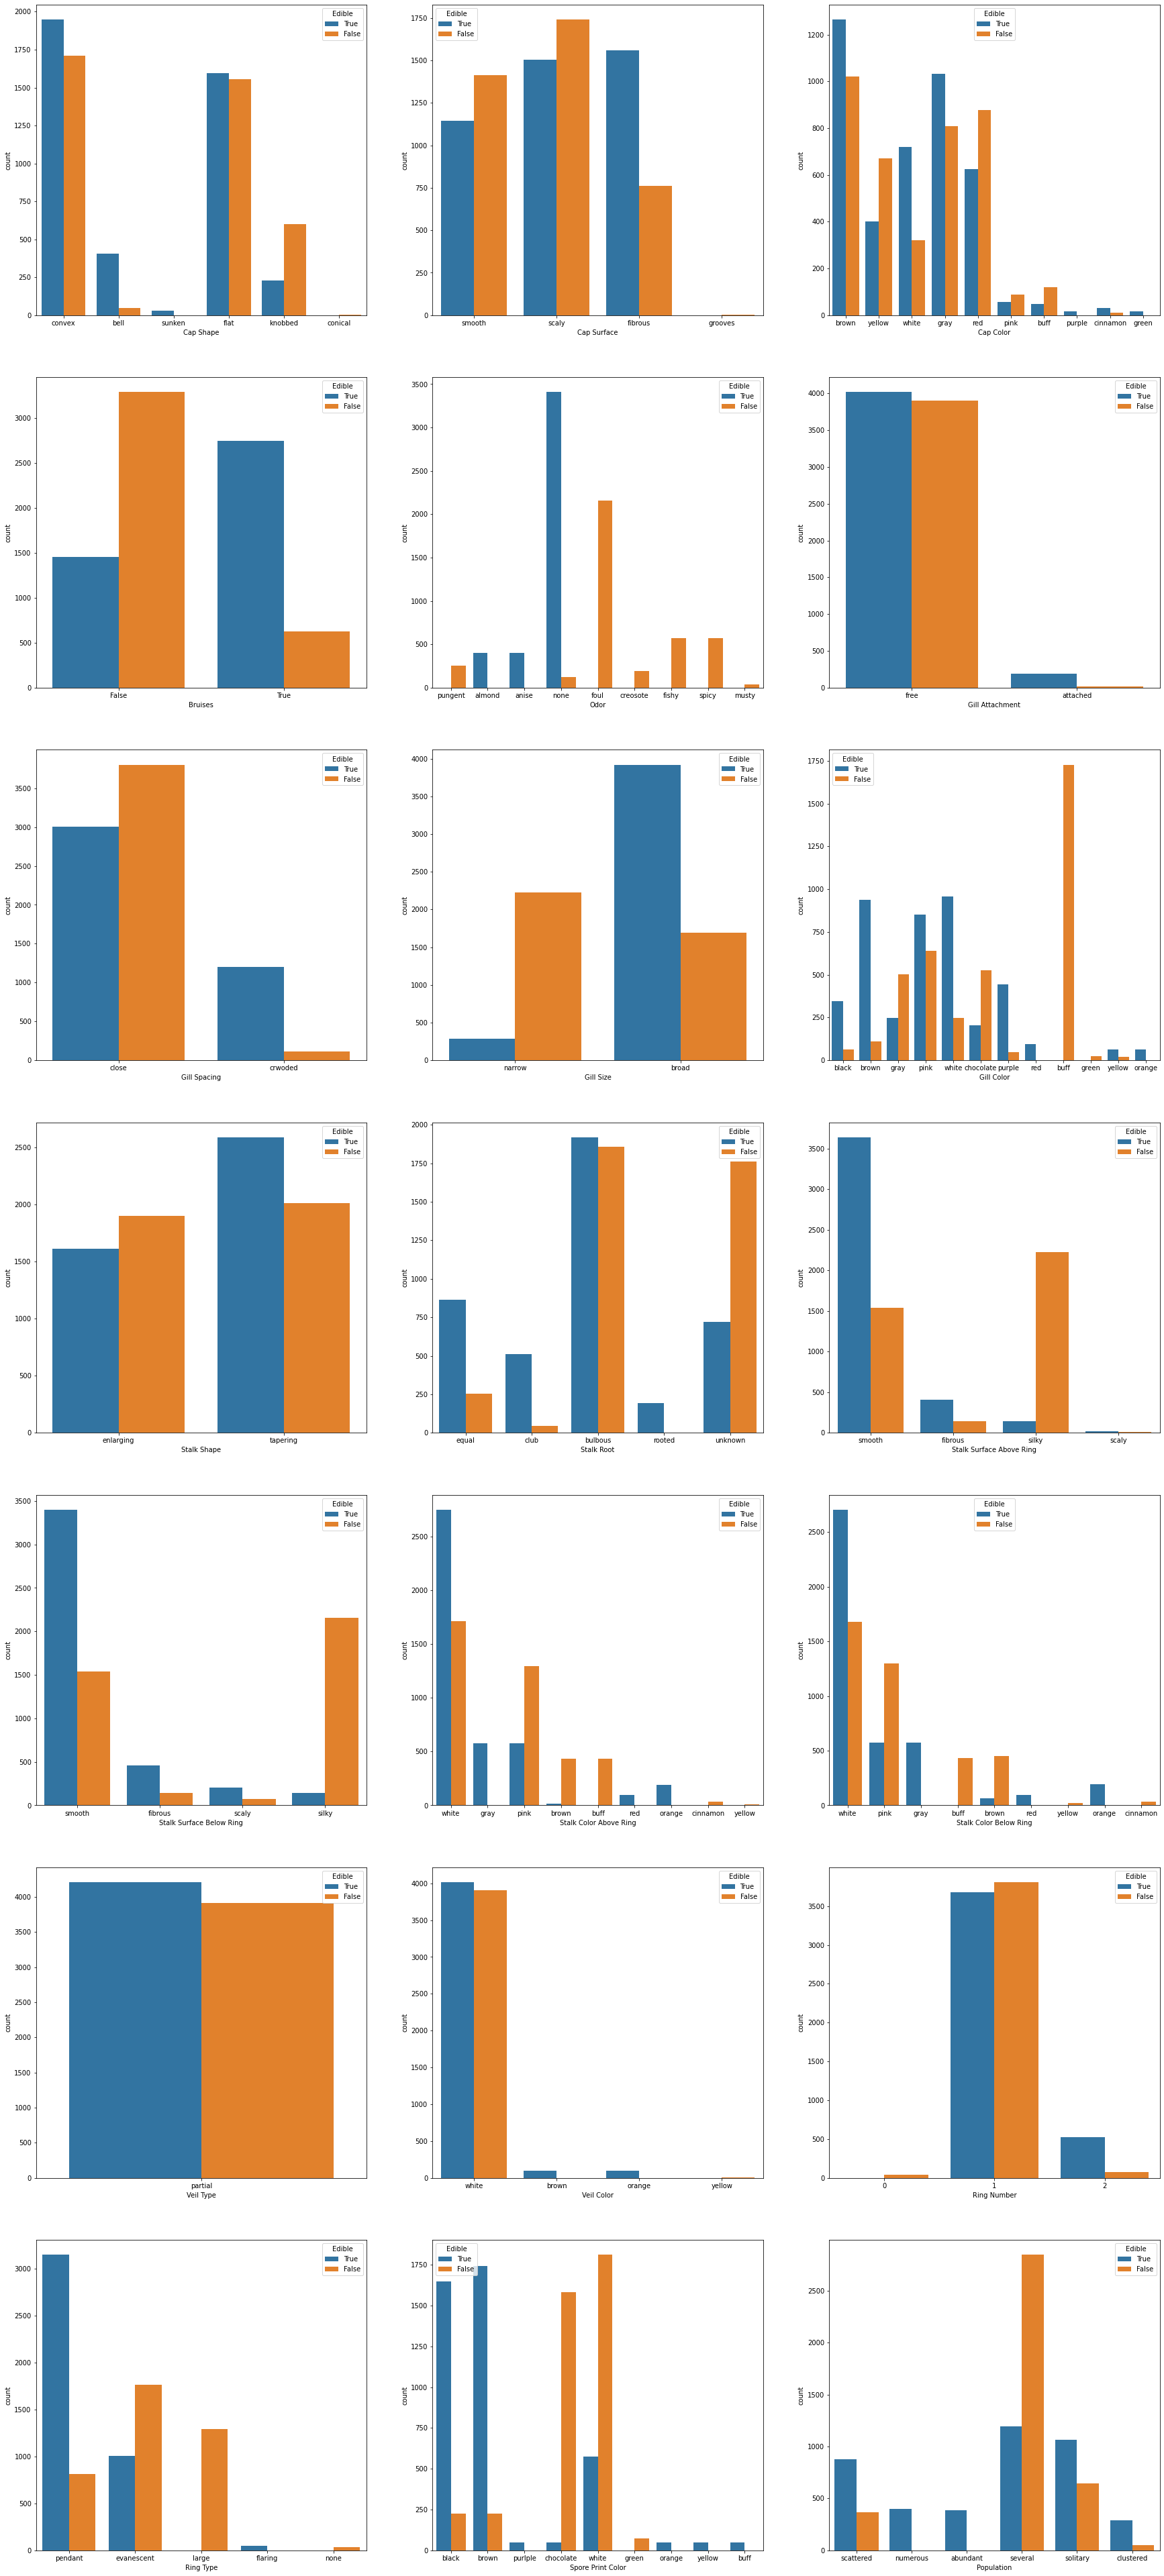

In [49]:
#def plotEdibility(df)
#for col in df.columns[1:-1]:
#    #print("{} has {}".format(col,df.nunique(axis=0)[col]))
#    length = df.nunique(axis=0)[col]
#    h = plt.figure(figsize=(10*3,10*int(length/3+1)))
#    axes = [None]*length
#    for i in range(0,length-1):
#        #print("{}: {}".format(col,i))
#        axes[i] = h.add_subplot(int(length/3+1),3,i+1)
#        sns.countplot(data=df, x=col, hue="Edible", hue_order=[True,False], ax=axes[i])
length = len(df.columns[1:-1])
axes = [None]*length
h = plt.figure(figsize=(10*3,10*int(length/3+1)))
for i in range(1, length):
    #print('col {}'.format(df.columns[i]))
    axes[i] = h.add_subplot(int(length/3+1),3,i)
    sns.countplot(data=df, x=df.columns[i], hue="Edible", hue_order=[True,False], ax=axes[i])
        